# Kaggle Dataset EDA - Data Science Salaries 2023  
Felix Allard - University of Ottawa - Computer Science (4th Year)

This dataset is called the 'Data Science Salaries 2023' dataset. Here is the link for its Kaggle information page: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023. The author of the dataset is Kaggle user 'randomarnab' and they sourced the data from aijobs.net which is a job site specifically for jobs in AI and Data Science related fields. It also keeps data on the salaries of some jobs in those same fields which is the origin of the dataset in question.
  
The **shape** of the dataset is 3755 rows by 11 columns/features.  

It has 11 columns which are the following:
*   work_year: The year the job posting. Numerical data.
*   experience_level: The experience level required for the job. Categorical data.
*   employment_type: The type of employment for the role. PT is Part-Time, FT is Full-time, CT is Contract, FL is Freelance. Categorical data.
*   job_title: The name of the role worked during the year. Categorical data.
*   salary: The total gross salary amount paid. Numerical data.
*   salary_currency: The currency of the salary paid as an ISO 4217 currency code. Categorical data.
*   salary_in_usd: The salary expressed in USD. Numerical data.
*   employee_residence: Employee's primary country of residence during the work year expressed as an ISO 3166 country code. Categorical data.
*   remote_ratio: The overall amount of work accomplished remotely. Numerical data.
*   company_location: Country of the employer's main office or contracting branch. Categorical data.
*   company_size: The median number of people that worked for the company during the salary year expressed in terms of small (100 or less), medium (101 to 500) and large (501 to 1000+). Numerical data.  
  
There are no signs of redundancy or missing values from the dataset schema. The data comes in as an export of a job site database and has already been cleaned and formatted.






In [3]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Download latest version
path = kagglehub.dataset_download("arnabchaki/data-science-salaries-2023")
file_path = os.path.join(path, 'ds_salaries.csv')

# Load the dataset into memory
df_salaries = pd.read_csv(file_path)

# Print a summary of the dataset to identify null values and data types
print(df_salaries.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
None


In [7]:
# Description of the content of each column by looking at the individual
print('************* Unique values contained in each column ***************')
for col in df_salaries.columns:
  print(col)
  print(f'Amount of unique values: {len(df_salaries[col].unique())}')
  print(df_salaries[col].unique())

************* Unique values contained in each column ***************
work_year
Amount of unique values: 4
[2023 2022 2020 2021]
experience_level
Amount of unique values: 4
['SE' 'MI' 'EN' 'EX']
employment_type
Amount of unique values: 4
['FT' 'CT' 'FL' 'PT']
job_title
Amount of unique values: 93
['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data

# Visualizing the EDA - Data Science Salaries 2023

1. **The data indicates that the most frequent range for salaries in Data Science jobs was between 120 000 and 140 000 USD (approximately).**  
  
The visualization below shows the result of a univariate analysis done with numerical data **(r1)**, in this case 'salary_in_usd'. By experimenting with bin sizes, we arrived to 23 different bins because it allowed for the data to be roughly distributed by slices of 20 000 USD. By looking at the distribution, we can see that the most frequent value is the bin ranging from around 120 000 to 140 000 USD.

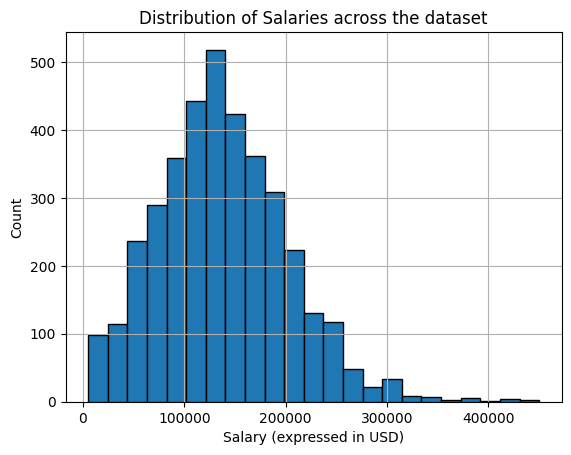

In [ ]:
df_salaries['salary_in_usd'].hist(bins=23, edgecolor='black')
plt.title('Distribution of Salaries across the dataset')
plt.xlabel('Salary (expressed in USD)')
plt.ylabel('Count')
plt.show()

2. **The dataset reveals that Senior-level positions are the most frequently required experience level for the salaries recorded.**  
  
Categorical data analysis was done on the 'experience_level' feature to arrive to this insight **(r2)**. In fact, it is evident by a simple value count that the most frequent value for required experience level in this dataset is the Senior level.

The 'experience_level' feature was also mapped to a new engineered feature called 'experience_rank' following typical hierarchy in organizations to give the data a meaningful order when it comes to experience level for the salaries.


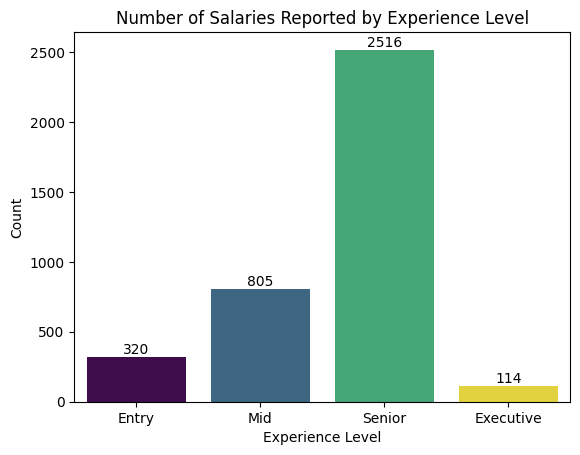

In [ ]:
# Map the experience_level values to numeric ranks
experience_mapping = {'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4}
df_salaries['experience_rank'] = df_salaries['experience_level'].map(experience_mapping)

# Build the countplot using Seaborn library
ax = sns.countplot(x='experience_rank', data=df_salaries, palette='viridis', hue='experience_rank', legend=False)
plt.title("Number of Salaries Reported by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Count")

# Annotate the bars with count values
for p in ax.patches:
  ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='bottom', fontsize=10)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Entry', 'Mid', 'Senior', 'Executive']) # Give meaning to the experience_rank feature
plt.show()

3. **The salaries found in the dataset are mostly associated with jobs that were fully remote or fully in person.**  
  
This insight is the result of a univariate analysis done on categorical data **(r2)** - the ratio of work done remotely. After plotting the counts for each category, we clearly see that both 0% and 100% bars have a frequency above 1500 and the 50% bar is under the 250 count.  
  
Color palette options found in Seaborn docs: https://seaborn.pydata.org/tutorial/color_palettes.html

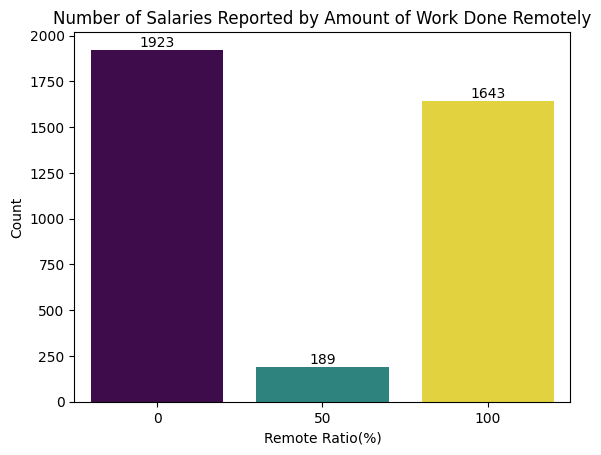

In [13]:
ax = sns.countplot(x='remote_ratio', data=df_salaries, palette='viridis', hue='remote_ratio', legend=False)
plt.title("Number of Salaries Reported by Amount of Work Done Remotely")
# Annotate the bars with count values
for p in ax.patches:
  ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='bottom', fontsize=10)
plt.xlabel("Remote Ratio(%)")
plt.ylabel("Count")
plt.show()

4. **The majority of the data found in this dataset is from employees who reside in the United States.**  
  
This insight was drawn by grouping the categorical data found in the 'employee_residence' column into 2 different groups: United States or Others. This qualifies as a Grouped-Data countplot **(r3)**. By performing this, we notice that 3004 of the 3755 rows found in the dataset are residing in the United States. That is more than 75% of the data.
  
The reason why we grouped the data in such a way was that we tried doing a count plot of the country of residence on all of the available categories for this feature and noticed that there were too many unique values with very little frequencies to display them all. Before grouping into 2 groups, there was 78 different values.

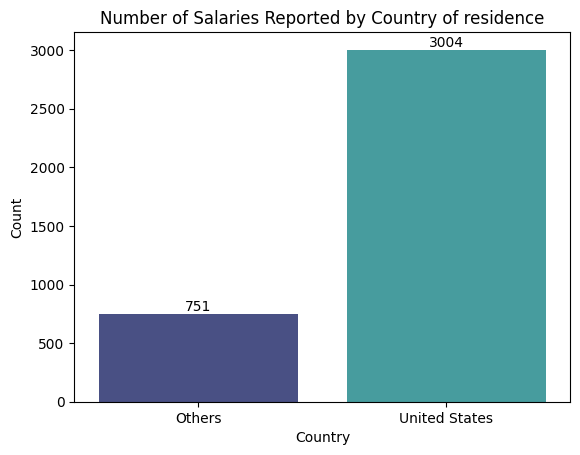

In [ ]:
# Preprocessing to group the employee_residence data into United States and Others.
df_salaries['employee_residence_cat'] = df_salaries['employee_residence'].apply(lambda x: 'United States' if x == 'US' else 'Others')
country_counts = df_salaries['employee_residence_cat'].value_counts()

# Create count plot
ax = sns.countplot(x='employee_residence_cat', data=df_salaries, palette='mako', hue='employee_residence_cat', legend=False)

# Annotate the bars with count values
for p in ax.patches:
  ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='bottom', fontsize=10)
# Add titles and labels
plt.title("Number of Salaries Reported by Country of residence")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

5. **The vast majority of the salaries reported in this dataset come are from full-time employees.**  
  
This insight comes from the categorical analysis using a value count to arrive to the conclusion that 3718 out 3755 salaries reported were from full-time positions.

In [12]:
print(df_salaries['employment_type'].value_counts())

employment_type
FT    3718
PT      17
CT      10
FL      10
Name: count, dtype: int64


6. **Most of the salaries reported in this dataset came from employees of medium sized companies (101 to 500 employees).**  
  
This insight was found by creating a simple countplot for the 'company_size' feature. This is also known as categorical data analysis **(r2)**. 3153 represents more than 80% of the dataset, therefore it can be said that most of the data from this dataset comes from mid-sized companies.  
  
Also note that the size of the company was mapped to a numerical value to provide meaningful ordering of the bars. Small, Medium and Large is a natural way to order these categories in that specific order.

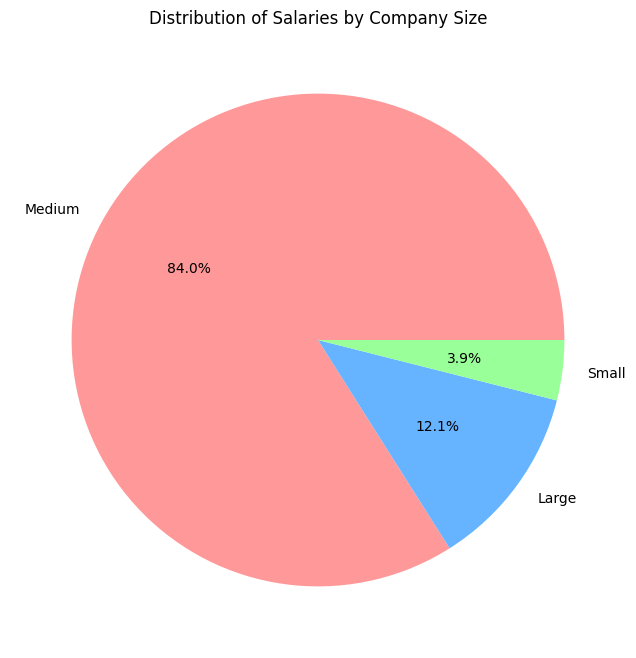

In [11]:
# Count the occurrences of each company size rank
company_size_counts = df_salaries['company_size_rank'].value_counts()

# Map the company size ranks back to their labels for display
size_labels = {1: 'Small', 2: 'Medium', 3: 'Large'}
company_size_counts.index = company_size_counts.index.map(size_labels)

# Define a color palette for the pie chart slices
colors = ['#ff9999', '#66b3ff', '#99ff99']  # Custom colors for Small, Medium, Large

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(company_size_counts, labels=company_size_counts.index, autopct='%1.1f%%', colors=colors)
plt.title("Distribution of Salaries by Company Size")
plt.show()

7. **In the United States, there are more yearly salaries over 135 000 USD than under 135 000 USD in this dataset, which is not the case for the rest of the World.**
  
This insight was discovered during bivariate analysis of categorical/categorical data **(r4)**. Here, the two categorical features analyzed were the salary category (over/under 135K USD) and employee residence category (United States or Other).  
  
We noticed that in the data, it is more frequent to get payed over 135 000 USD in the United States than under. This is not true for the data from the rest of the world, showing that most employees are earning under 135 000K for those regions.

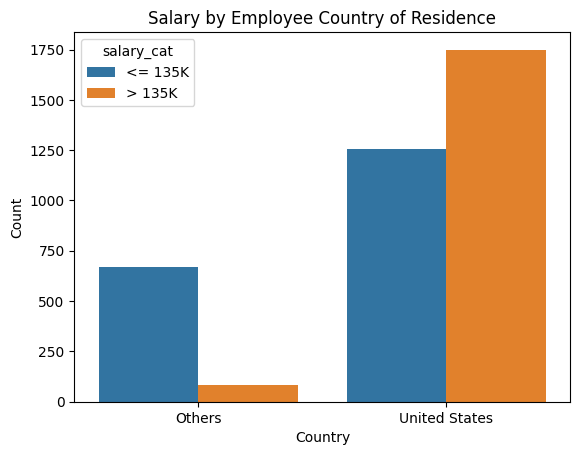

In [55]:
# Creating a feature 'salary_cat' to separate the salaries under and over 135 000 USD
df_salaries['salary_cat'] = df_salaries['salary_in_usd'].apply(lambda x: '> 135K' if x > 135000 else '<= 135K')

# Plotting cross tabulation values for salary category and country of residence of the employee
pd.crosstab(df_salaries['employee_residence_cat'], df_salaries['salary_cat'], margins=True)

# Add titles and formating
sns.countplot(x='employee_residence_cat', hue='salary_cat', data=df_salaries)
plt.title('Salary by Employee Country of Residence')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

8. **The data indicates that mid-sized companies offer the highest median
salary to employees in Data Science compared to other company sizes.**  
  
This insight was found performing bivariate, numerical/categorical analysis on the salaries reported by the size of their respective company **(r7)**. The boxes were again ordered by natural company size and the data shows that the highest median salary is found in the 'medium' size.

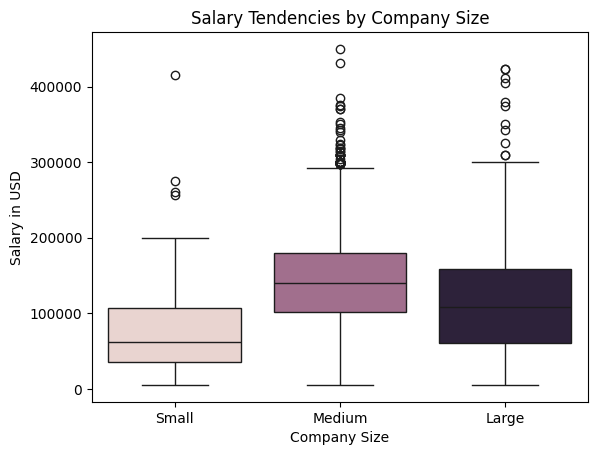

In [ ]:
# Add titles and formating
sns.boxplot(x='company_size_rank', y='salary_in_usd', hue='company_size_rank', data=df_salaries, legend=False)
plt.title('Salary Tendencies by Company Size')
plt.xlabel('Company Size')
plt.xticks(ticks=[0, 1, 2], labels=['Small', 'Medium', 'Large'])
plt.ylabel('Salary in USD')
plt.show()

9. **Executive positions have the highest median salary among all experience levels.**  
  
To analyze the relationship between salary (numerical) and experience level (categorical), I created a box plot **(r7)**. By comparing the distributions across categoires, we were able to identify that executive positions have the highest median salary among all experience levels.  
  
Furthermore, the boxes have been ordered by 'experience_rank' to give them a meaningful ordering by the level of experience required for the position.

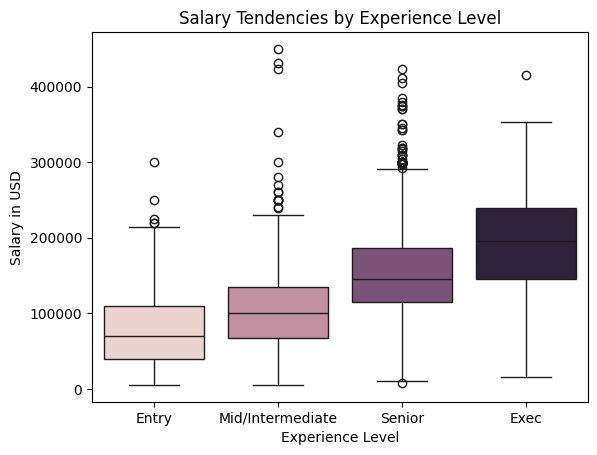

In [ ]:
# Add titles and formating
sns.boxplot(x='experience_rank', y='salary_in_usd', hue='experience_rank', data=df_salaries, legend=False)
plt.title('Salary Tendencies by Experience Level')
plt.xlabel('Experience Level')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Entry', 'Mid/Intermediate', 'Senior', 'Exec'])
plt.ylabel('Salary in USD')
plt.show()

10. **Employees from the United States tend to earn higher salaries than those residing in the rest of the world.**  
  
This insight was fonud through bivariate, numerical/categorical analysis **(r7)** of the 'salary_in_usd' feature (numerical) and the 'employee_residence_cat' feature (categorical). By analysing the box plots created during this analysis, we are able to determine that the central tendencies of the salaries reported from United States residents were greater than those from the rest of the world.


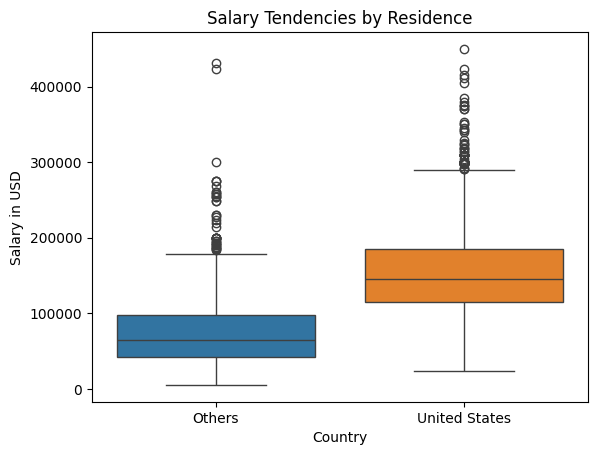

In [57]:
# Add titles and formating
sns.boxplot(x='employee_residence_cat', y='salary_in_usd', hue='employee_residence_cat', data=df_salaries, legend=False)
plt.title('Salary Tendencies by Residence')
plt.xlabel('Country')
plt.ylabel('Salary in USD')
plt.show()